<a href="https://colab.research.google.com/github/sit-xinli/cv-course15/blob/main/samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


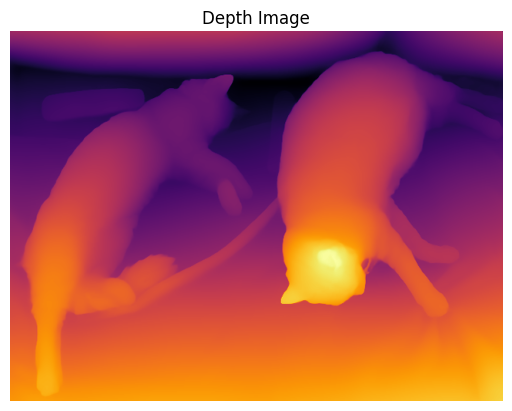

In [1]:
from transformers import pipeline
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt

# load pipe
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

# load image
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# inference
depth = pipe(image)["depth"]

# Convert to numpy array
depth_array = np.array(depth)


# Normalize for visualization
depth_normalized = (depth_array - depth_array.min()) / (depth_array.max() - depth_array.min())

# Save depth image
plt.imsave("depth_image.png", depth_normalized, cmap='inferno')

# Display in notebook
plt.imshow(depth_normalized, cmap='inferno')
plt.axis('off')  # Optional: hides axis ticks
plt.title("Depth Image")
plt.show()


Saving スクリーンショット 2025-04-19 212726.png to スクリーンショット 2025-04-19 212726.png


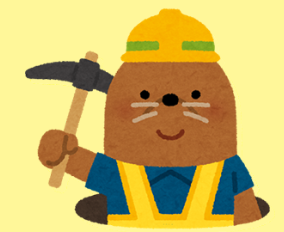

Device set to use cpu


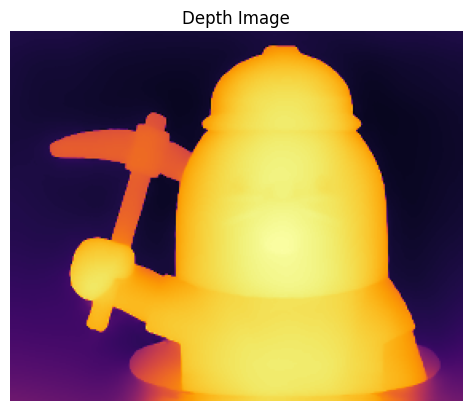

In [2]:

from IPython.display import display
from google.colab import files

# Upload image interactively
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)

# Display the image
display(image)

# Load depth estimation pipeline
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

# Run inference
depth = pipe(image)["depth"]

# Convert to NumPy array and normalize
depth_array = np.array(depth)
depth_normalized = (depth_array - depth_array.min()) / (depth_array.max() - depth_array.min())

# Show depth image
plt.imshow(depth_normalized, cmap='inferno')
plt.axis('off')
plt.title("Depth Image")
plt.show()
